In [1]:
import os
import multiprocessing
import sys
import platform
import threading
import time
import random
import cv2
import matplotlib.pyplot as plt

#### ACTIVE THREADS ####

In [2]:
active = threading.active_count()
print("Active Threads = ",active)

Active Threads =  6


#### NUMBER OF CORES ####

In [3]:
core = multiprocessing.cpu_count()
print("Number of cores = ",core)

Number of cores =  8


#### OPERATING SYSTEM ####

In [4]:
print ("OS Platform: ", platform.platform())

OS Platform:  Windows-10-10.0.22621-SP0


In [2]:
# DIR -> PATH OF IMAGES TO BE CONVERTED INTO GREYSCALE
path = './IMG/'
dir = os.listdir(os.path.join(path))
# NUMBER OF IMAGES
len(dir)    

30000

#### FUNCTION TO CONVERT AN IMAGE TO GREYSCALE ####

In [8]:
def task(path,directory,name):
    img = cv2.imread(path)
    grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grey_image_path = os.path.join(directory,name)
    cv2.imwrite(grey_image_path,grey_image)

#### MULTITHREADING FUNCTION ####

### parameters: ###

totalFiles :  number of files to convert to grey scale 

number_of_threads : number of active threads cannot exceed this number

path : path of folder where image files are located

In [12]:
def Multithreading(totalFiles,number_of_threads,path):
    
    print("Program Started....")
    
    # pic : number of pictures converted
    pic = 0
    
    # names of all images
    files = os.listdir(path)
    
    # making directory to store converted images
    os.makedirs(str(number_of_threads)+'th')
    directory = str(number_of_threads)+'th'
    
    
    # starting timer
    startTime = time.time()
    activeThreads = threading.active_count()
    
    
    for i in files:
        if(pic == totalFiles):
            break
        cmd = i 
        
        # joining image path and image name
        filep = os.path.join(path,i)
        
        # creating thread
        t = threading.Thread(target=task , args=(filep,directory,cmd))
        t.start()
   
        if(pic % 100 == 0):
            print ("Creating file %s"%(pic))
      
        pic+=1
        
        # prevents creating of extra threads
        while True:
            if threading.active_count() - activeThreads + 1 <= number_of_threads:
                break

    # waiting for all threads to end
    while True:
        if threading.active_count() == activeThreads:
            break
        else:
            print ("    Thread still running (left %d)..."%(threading.active_count() - activeThreads))
            time.sleep(1)
  
    print(" All Thread ends")

    print("Program Finished")
    print("Total Time %f sec" % (round( time.time() - startTime,4)))
    return round( time.time() - startTime,4)

In [14]:
threads = 11
times = []
path = './IMG/'
dir = len(os.listdir(os.path.join(path)))
files = 10000
file_num = min(dir,files)
print('Number of files = ',dir)
for i in range(1,threads+1):
    print('Threads created = ',i)
    print('Before Multi threading = ',threading.active_count())
    times.append(Multithreading(dir,i,path))

Number of files =  30000
Threads created =  1
Before Multi threading =  6
Program Started....
Creating file 0
Creating file 100
Creating file 200
Creating file 300
Creating file 400
Creating file 500
Creating file 600
Creating file 700
Creating file 800
Creating file 900
Creating file 1000
Creating file 1100
Creating file 1200
Creating file 1300
Creating file 1400
Creating file 1500
Creating file 1600
Creating file 1700
Creating file 1800
Creating file 1900
Creating file 2000
Creating file 2100
Creating file 2200
Creating file 2300
Creating file 2400
Creating file 2500
Creating file 2600
Creating file 2700
Creating file 2800
Creating file 2900
Creating file 3000
Creating file 3100
Creating file 3200
Creating file 3300
Creating file 3400
Creating file 3500
Creating file 3600
Creating file 3700
Creating file 3800
Creating file 3900
Creating file 4000
Creating file 4100
Creating file 4200
Creating file 4300
Creating file 4400
Creating file 4500
Creating file 4600
Creating file 4700
Creati

### result ###

In [16]:
times

[2571.6565,
 971.4161,
 567.8947,
 393.298,
 270.6599,
 256.3903,
 196.658,
 195.3257,
 217.2191,
 223.568,
 210.2702]

In [14]:
import csv
import pandas as pd

In [15]:
df = pd.read_csv('times.csv')
df['Python'] = times

In [16]:
df

,Threads,Python
0,1,2571.6565
1,2,971.4161
2,3,567.8947
3,4,393.2980
4,5,270.6599
5,6,256.3903
6,7,196.6580
7,8,195.3257
8,9,217.2191
9,10,223.5680


### storing result in csv file ###

In [20]:
df.to_csv('times.csv')

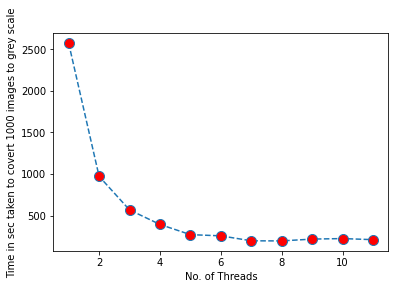

In [21]:
threads = list(range(1,len(times)+1))
plt.plot(threads,times, linestyle='dashed',marker = 'o',markerfacecolor='red', markersize=10)
plt.xlabel('No. of Threads')
plt.ylabel('Time in sec taken to covert 1000 images to grey scale')
plt.show()